En allant plus loin, essai du modèle VGG16, MobileNetV2 et InceptionV3b, puis mplantation de notre propore modéle inspiré de ces derniers et essai sur database chiens/chats. Enfin fine tuning de ces modéles.<br>
Notebbok tourné sur GPU.

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Activation
import tensorflow as tf
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [4]:
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
for device in gpu_devices:
    tf.config.experimental.set_memory_growth(device, True)

In [ ]:
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


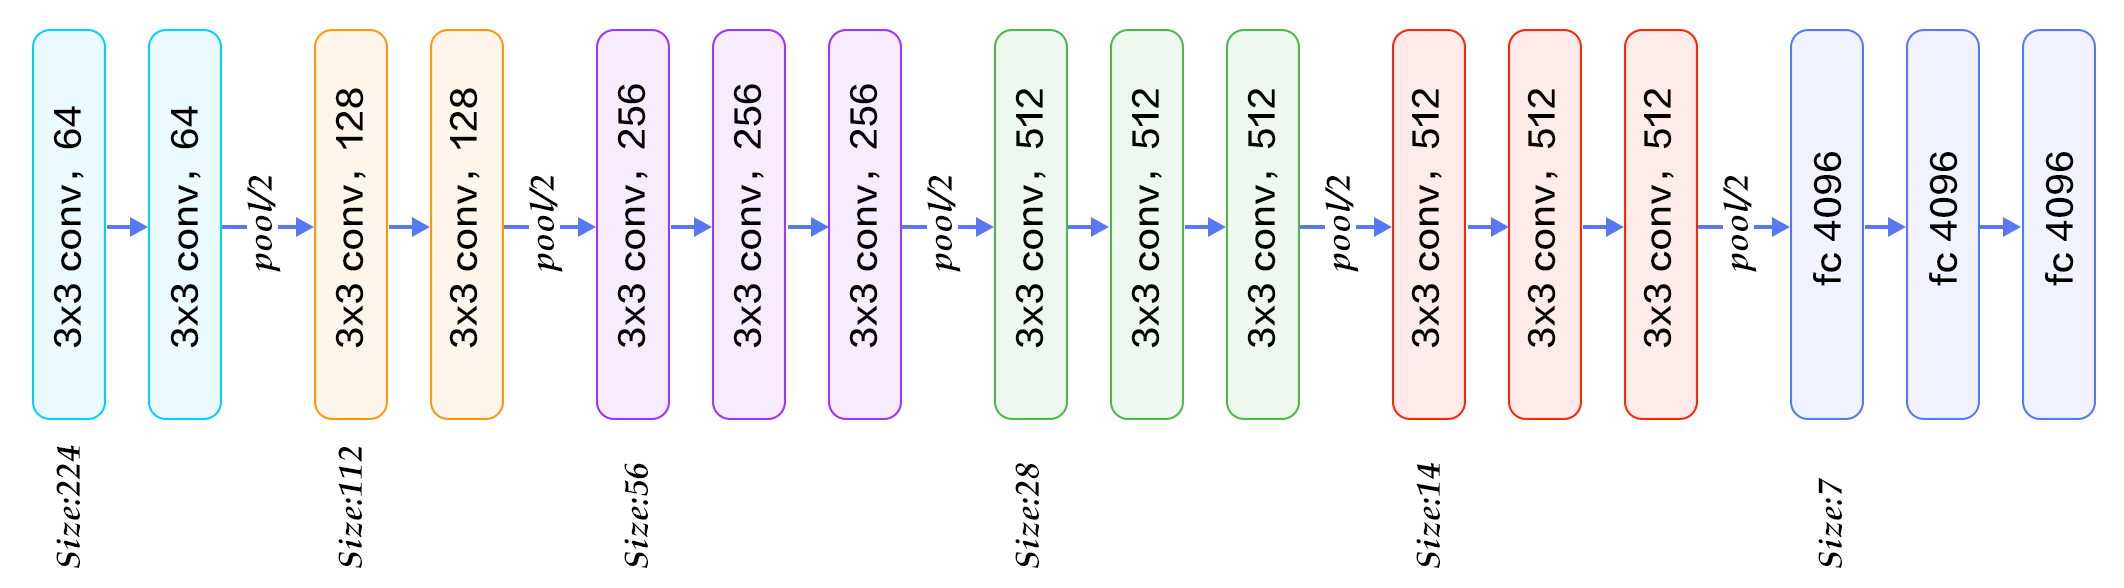

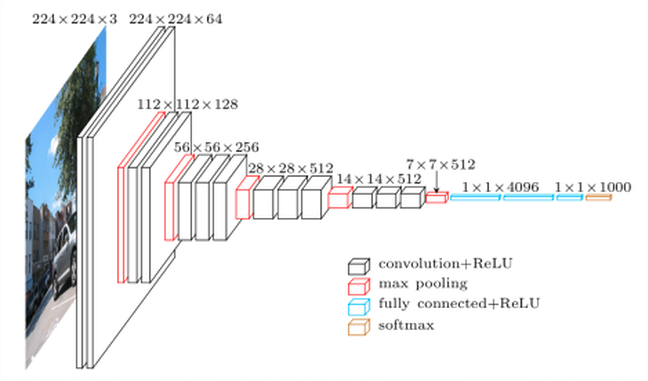

# Création d'un réseau de neurones vide

In [ ]:
my_VGG16 = Sequential()

# Ajout de couches

## Convolution and pooling

In [ ]:
# # Ajout de la première couche de convolution, suivie d'une couche ReLU
# my_VGG16.add(Conv2D(64, (3, 3), input_shape=(224, 224, 3), padding='same', activation='relu'))

# # Ajout de la deuxième couche de convolution, suivie  d'une couche ReLU
# my_VGG16.add(Conv2D(64, (3, 3), padding='same', activation='relu'))

# # Ajout de la première couche de pooling
# my_VGG16.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

## Flatten and dense

In [ ]:
# my_VGG16.add(Flatten())  # Conversion des matrices 3D en vecteur 1D

# # Ajout de la première couche fully-connected, suivie d'une couche ReLU
# my_VGG16.add(Dense(4096, activation='relu'))

# # Ajout de la deuxième couche fully-connected, suivie d'une couche ReLU
# my_VGG16.add(Dense(4096, activation='relu'))

# # Ajout de la dernière couche fully-connected qui permet de classifier
# my_VGG16.add(Dense(1000, activation='softmax'))

## VGG16 from keras

In [ ]:
# from keras.applications.vgg16 import VGG16

# model = VGG16()

In [ ]:
import pickle
# pickle.dump(model, open( "vgg16_keras.pkl", "wb" ) )
model = pickle.load(open( "vgg16_keras.pkl", "rb" ))

In [ ]:
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input

image1 = load_img('image1.jpg', target_size=(224, 224))  # Charger l'image
img1 = img_to_array(image1)  # Convertir en tableau numpy
img1 = img1.reshape((1, img1.shape[0], img1.shape[1], img1.shape[2]))  # Créer la collection d'images (un seul échantillon)
img1 = preprocess_input(img1)  # Prétraiter l'image comme le veut VGG-16

image2 = load_img('image2.jpg', target_size=(224, 224))  # Charger l'image
img2 = img_to_array(image2)  # Convertir en tableau numpy
img2 = img2.reshape((1, img2.shape[0], img2.shape[1], img2.shape[2]))  # Créer la collection d'images (un seul échantillon)
img2 = preprocess_input(img2)  # Prétraiter l'image comme le veut VGG-16

image3 = load_img('image3.jpg', target_size=(224, 224))  # Charger l'image
img3 = img_to_array(image3)  # Convertir en tableau numpy
img3 = img3.reshape((1, img3.shape[0], img3.shape[1], img3.shape[2]))  # Créer la collection d'images (un seul échantillon)
img3 = preprocess_input(img3)  # Prétraiter l'image comme le veut VGG-16

In [ ]:
image1

In [ ]:
image2

In [ ]:
image3

In [ ]:
y1 = model.predict(img1)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y2 = model.predict(img2)
y3 = model.predict(img3)

In [ ]:
from keras.applications.vgg16 import decode_predictions

# Afficher les 3 classes les plus probables
print(40*"=")
print("Image1")
print('Top 3 :', decode_predictions(y1, top=3)[0])
print(40*"=")
print("Image2")
print('Top 3 :', decode_predictions(y2, top=3)[0])
print(40*"=")
print("Image3")
print('Top 3 :', decode_predictions(y3, top=3)[0])

# Other models: MobileNetV2 et InceptionV3b

In [ ]:
from keras.applications.mobilenet_v2 import MobileNetV2

model = MobileNetV2()

In [ ]:
pickle.dump(model, open( "mobilenetv2_keras.pkl", "wb" ) )
# model = pickle.load(open( "vgg16_keras.pkl", "rb" ))

In [ ]:
y1 = model.predict(img1)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y2 = model.predict(img2)
y3 = model.predict(img3)

In [ ]:
model.summary()

In [ ]:
from keras.applications.mobilenet_v2 import decode_predictions

# Afficher les 3 classes les plus probables
print(40*"=")
print("Image1")
print('Top 3 :', decode_predictions(y1, top=3)[0])
print(40*"=")
print("Image2")
print('Top 3 :', decode_predictions(y2, top=3)[0])
print(40*"=")
print("Image3")
print('Top 3 :', decode_predictions(y3, top=3)[0])

In [ ]:
from keras.applications.inception_v3 import InceptionV3

model = InceptionV3()

In [ ]:
pickle.dump(model, open( "inceptionv3_keras.pkl", "wb" ) )
# model = pickle.load(open( "vgg16_keras.pkl", "rb" ))

In [ ]:
image1 = load_img('image1.jpg', target_size=(299, 299))  # Charger l'image
img1 = img_to_array(image1)  # Convertir en tableau numpy
img1 = img1.reshape((1, img1.shape[0], img1.shape[1], img1.shape[2]))  # Créer la collection d'images (un seul échantillon)
img1 = preprocess_input(img1)  # Prétraiter l'image comme le veut VGG-16

image2 = load_img('image2.jpg', target_size=(299, 299))  # Charger l'image
img2 = img_to_array(image2)  # Convertir en tableau numpy
img2 = img2.reshape((1, img2.shape[0], img2.shape[1], img2.shape[2]))  # Créer la collection d'images (un seul échantillon)
img2 = preprocess_input(img2)  # Prétraiter l'image comme le veut VGG-16

image3 = load_img('image3.jpg', target_size=(299, 299))  # Charger l'image
img3 = img_to_array(image3)  # Convertir en tableau numpy
img3 = img3.reshape((1, img3.shape[0], img3.shape[1], img3.shape[2]))  # Créer la collection d'images (un seul échantillon)
img3 = preprocess_input(img3)  # Prétraiter l'image comme le veut VGG-16

In [ ]:
y1 = model.predict(img1)  # Prédir la classe de l'image (parmi les 1000 classes d'ImageNet)
y2 = model.predict(img2)
y3 = model.predict(img3)

In [ ]:
model.summary()

In [ ]:
from keras.applications.inception_v3 import decode_predictions

# Afficher les 3 classes les plus probables
print(40*"=")
print("Image1")
print('Top 3 :', decode_predictions(y1, top=3)[0])
print(40*"=")
print("Image2")
print('Top 3 :', decode_predictions(y2, top=3)[0])
print(40*"=")
print("Image3")
print('Top 3 :', decode_predictions(y3, top=3)[0])

# Cats vs dogs

## Making datasets

In [1]:
import os
import shutil, os, glob
import glob
import random

In [2]:
def create_directory(dirName):
    if not os.path.exists(dirName):
        os.mkdir(dirName)
        print("Directory " , dirName ,  " Created ")
    else:    
        print("Directory " , dirName ,  " already exists")  
        
def move_cats_dogs(dirName):
    i=0
    for filename in  os.listdir(dirName + '/'):
        if '.jpg' in str(filename):
            if 'dog' in str(filename):
                shutil.move(dirName + '/' + filename, dirName + '/dogs')
                os.rename(dirName + '/dogs/' + filename, dirName + '/dogs/' + str(i)+ '.jpg')
            else:
                shutil.move(dirName + '/' + filename, dirName + '/cats')
                os.rename(dirName + '/cats/'  + filename, dirName + '/cats/' + str(i)+ '.jpg')
        i+=1

create_directory('dogs-vs-cats/data')
create_directory('dogs-vs-cats/data/test')
create_directory('dogs-vs-cats/data/train')
create_directory('dogs-vs-cats/data/validation')

create_directory('dogs-vs-cats/data/test/cats')
create_directory('dogs-vs-cats/data/test/dogs')
create_directory('dogs-vs-cats/data/train/cats')
create_directory('dogs-vs-cats/data/train/dogs')
create_directory('dogs-vs-cats/data/validation/cats')
create_directory('dogs-vs-cats/data/validation/dogs')

num_pics_train = len(os.listdir('dogs-vs-cats/train/'))

list_files_train = random.sample(glob.glob('dogs-vs-cats/train/*.jpg'), 2500)
for filePath in list_files_train:
    shutil.move(filePath, 'dogs-vs-cats/data/train')
    
list_files_test = random.sample(glob.glob('dogs-vs-cats/train/*.jpg'), 500)
for filePath in list_files_test:
    shutil.move(filePath, 'dogs-vs-cats/data/test')
    
list_files_validation = random.sample(glob.glob('dogs-vs-cats/train/*.jpg'), 500)
for filePath in list_files_validation:
    shutil.move(filePath, 'dogs-vs-cats/data/validation')
    
move_cats_dogs('dogs-vs-cats/data/test')
move_cats_dogs('dogs-vs-cats/data/train')
move_cats_dogs('dogs-vs-cats/data/validation')

Directory  dogs-vs-cats/data  already exists
Directory  dogs-vs-cats/data/test  already exists
Directory  dogs-vs-cats/data/train  already exists
Directory  dogs-vs-cats/data/validation  already exists
Directory  dogs-vs-cats/data/test/cats  already exists
Directory  dogs-vs-cats/data/test/dogs  already exists
Directory  dogs-vs-cats/data/train/cats  already exists
Directory  dogs-vs-cats/data/train/dogs  already exists
Directory  dogs-vs-cats/data/validation/cats  already exists
Directory  dogs-vs-cats/data/validation/dogs  already exists


In [10]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1.0/255.0)

train_dg = datagen.flow_from_directory('dogs-vs-cats/data/train', class_mode='binary', batch_size=64,target_size = (64,64))

test_dg = datagen.flow_from_directory('dogs-vs-cats/data/test', class_mode='binary', batch_size=64,target_size = (64,64))

validation_dg = datagen.flow_from_directory('dogs-vs-cats/data/validation', class_mode='binary', batch_size=64,target_size = (64,64))

Found 4373 images belonging to 2 classes.
Found 868 images belonging to 2 classes.
Found 877 images belonging to 2 classes.


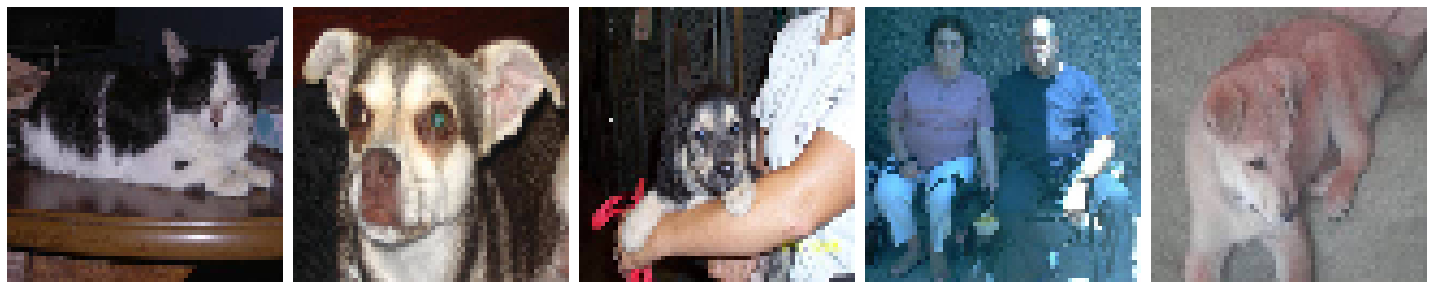

In [11]:
sample_training_images, _ = next(train_dg)
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
plotImages(sample_training_images[:5])

## Modeling

In [ ]:
def get_model(input_shape = (256,256,3),c1=16,c2=32, k1=10,k2=1, metrics=['accuracy']):

    model = Sequential([
                        Conv2D(c1,kernel_size=3,input_shape=input_shape),
                        Activation('relu'),
                        Conv2D(c2,kernel_size=3),
                        Activation('relu'),
                        MaxPooling2D(3),
                        Flatten(),
                        Dense(k1),
                        Activation('sigmoid'),
                        Dense(k2),
                        Activation('sigmoid')])

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=metrics)
    return model

In [ ]:
model=get_model(input_shape=(64,64,3))

In [ ]:
model.summary()

In [ ]:
from keras.callbacks import EarlyStopping

history = model.fit_generator(train_dg, steps_per_epoch=16, epochs = 50, 
                              validation_data=validation_dg, validation_steps=8, callbacks=[EarlyStopping(monitor='accuracy', patience=5, verbose=1)])

In [ ]:
print(history.history.keys())  

plt.figure(1,figsize=(15,10))  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(history.history['accuracy'])  
plt.plot(history.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(history.history['loss'])  
plt.plot(history.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

In [ ]:
# evaluate model
loss = model.evaluate_generator(test_dg, steps=24)
print(loss)

# Transfer Learning

## VGG16 transfert

In [27]:
from keras.applications.vgg16 import VGG16
from keras.models import Model

# Charger VGG-16 pré-entraîné sur ImageNet et sans les couches fully-connected
model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))



In [28]:
# Récupérer la sortie de ce réseau
x = model.output

# x = model.Flatten(layer[-1]).output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
x = Dense(128, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)

# Définir le nouveau modèle
new_model1 = Model(inputs=model.input, outputs=predictions)

In [29]:
new_model1.summary()

Model: "model_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 64, 64, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 64, 64, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 64, 64, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 32, 32, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 32, 32, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 32, 32, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 16, 16, 128)       0   

In [31]:
import pickle
pickle.dump(new_model1, open( "vgg16_dogs_cats_keras.pkl", "wb" ) )
# model = pickle.load(open( "vgg16_dogs_cats_keras.pkl", "rb" ))

## Fine tuning total

Ici, on entraîne tout le réseau, donc il faut rendre toutes les couches "entraînables" :

In [32]:
for layer in model.layers:
   layer.trainable = True

In [34]:
from keras import optimizers

epochs = 15

# Compiler le modèle 
new_model1.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"],)

# Entraîner sur les données d'entraînement (X_train, y_train)
model_info = new_model1.fit(train_dg,validation_data=validation_dg, epochs=epochs, verbose=2)


Epoch 1/15
 - 17s - loss: 0.6468 - accuracy: 0.6369 - val_loss: 0.5670 - val_accuracy: 0.7070
Epoch 2/15
 - 18s - loss: 0.5198 - accuracy: 0.7569 - val_loss: 0.5158 - val_accuracy: 0.7822
Epoch 3/15
 - 17s - loss: 0.4100 - accuracy: 0.8145 - val_loss: 0.4582 - val_accuracy: 0.8141
Epoch 4/15
 - 17s - loss: 0.3619 - accuracy: 0.8386 - val_loss: 0.4276 - val_accuracy: 0.8369
Epoch 5/15
 - 17s - loss: 0.3176 - accuracy: 0.8587 - val_loss: 0.3903 - val_accuracy: 0.8119
Epoch 6/15
 - 17s - loss: 0.2886 - accuracy: 0.8772 - val_loss: 0.4635 - val_accuracy: 0.8187
Epoch 7/15
 - 17s - loss: 0.2604 - accuracy: 0.8882 - val_loss: 0.4747 - val_accuracy: 0.8381
Epoch 8/15
 - 16s - loss: 0.2397 - accuracy: 0.9010 - val_loss: 0.2426 - val_accuracy: 0.8461
Epoch 9/15
 - 16s - loss: 0.2318 - accuracy: 0.9026 - val_loss: 0.3185 - val_accuracy: 0.8449
Epoch 10/15
 - 16s - loss: 0.1966 - accuracy: 0.9211 - val_loss: 0.4201 - val_accuracy: 0.8563
Epoch 11/15
 - 16s - loss: 0.1782 - accuracy: 0.9335 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


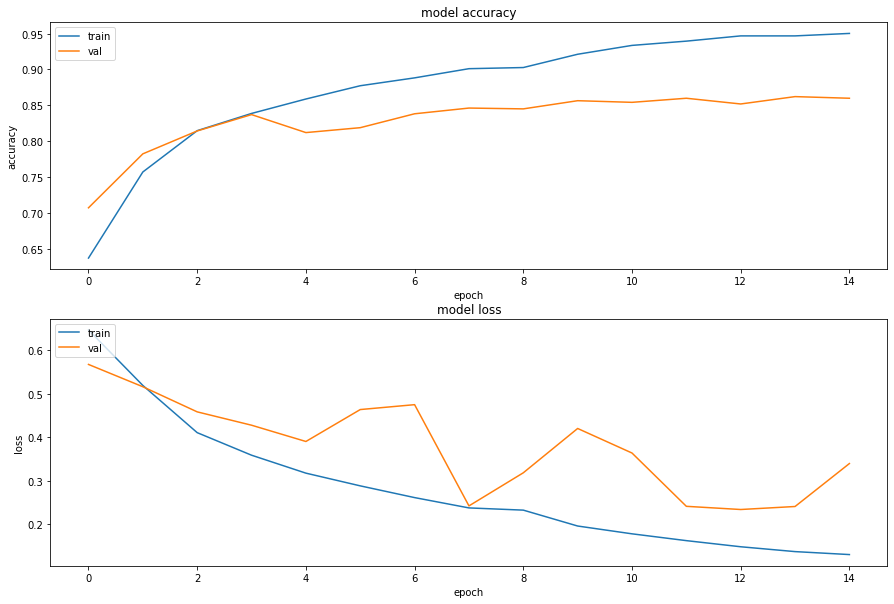

In [35]:
print(model_info.history.keys())  

plt.figure(1,figsize=(15,10))  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(model_info.history['accuracy'])  
plt.plot(model_info.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(model_info.history['loss'])  
plt.plot(model_info.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

## Extraction de features

On entraîne seulement le nouveau classifieur et on ne ré-entraîne pas les autres couches :

In [38]:
model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

for layer in model.layers:
   layer.trainable = False

# Récupérer la sortie de ce réseau
x = model.output

# x = model.Flatten(layer[-1]).output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
x = Dense(128, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)

# Définir le nouveau modèle
new_model2 = Model(inputs=model.input, outputs=predictions)


epochs = 15

# Compiler le modèle 
new_model2.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"],)

# Entraîner sur les données d'entraînement (X_train, y_train)
model_info2 = new_model2.fit(train_dg,validation_data=validation_dg, epochs=epochs, verbose=2)

Epoch 1/15
 - 18s - loss: 0.7347 - accuracy: 0.4869 - val_loss: 0.7144 - val_accuracy: 0.4949
Epoch 2/15
 - 17s - loss: 0.6998 - accuracy: 0.5136 - val_loss: 0.6846 - val_accuracy: 0.5245
Epoch 3/15
 - 17s - loss: 0.6852 - accuracy: 0.5520 - val_loss: 0.6723 - val_accuracy: 0.5815
Epoch 4/15
 - 16s - loss: 0.6724 - accuracy: 0.5888 - val_loss: 0.6586 - val_accuracy: 0.6123
Epoch 5/15
 - 17s - loss: 0.6607 - accuracy: 0.6080 - val_loss: 0.6499 - val_accuracy: 0.6306
Epoch 6/15
 - 17s - loss: 0.6510 - accuracy: 0.6282 - val_loss: 0.6147 - val_accuracy: 0.6465
Epoch 7/15
 - 18s - loss: 0.6421 - accuracy: 0.6474 - val_loss: 0.6424 - val_accuracy: 0.6613
Epoch 8/15
 - 18s - loss: 0.6341 - accuracy: 0.6627 - val_loss: 0.6225 - val_accuracy: 0.6716
Epoch 9/15
 - 18s - loss: 0.6252 - accuracy: 0.6721 - val_loss: 0.6319 - val_accuracy: 0.6842
Epoch 10/15
 - 17s - loss: 0.6177 - accuracy: 0.6789 - val_loss: 0.6179 - val_accuracy: 0.6899
Epoch 11/15
 - 16s - loss: 0.6113 - accuracy: 0.6890 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


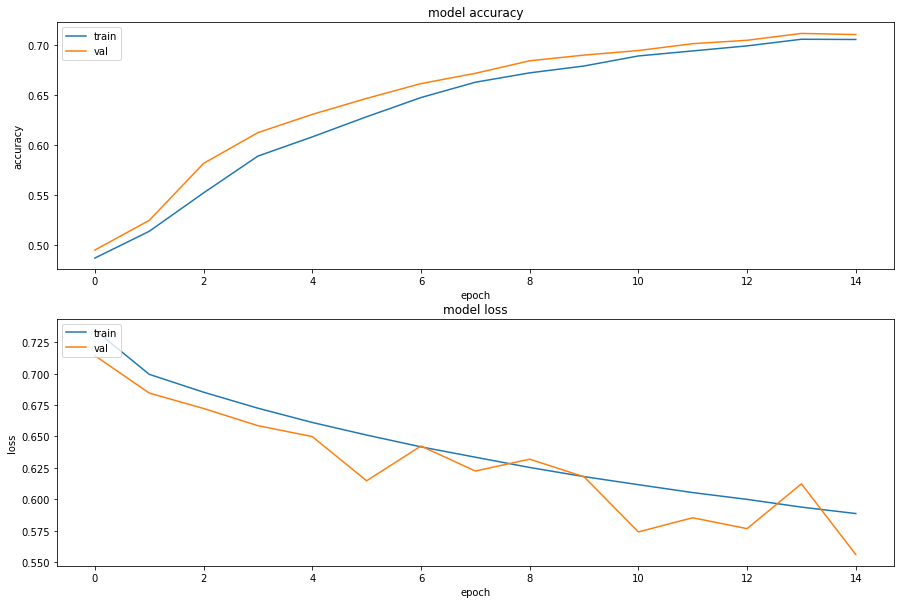

In [39]:
print(model_info.history.keys())  

plt.figure(1,figsize=(15,10))  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(model_info2.history['accuracy'])  
plt.plot(model_info2.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(model_info2.history['loss'])  
plt.plot(model_info2.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  

## fine_tuning partiel

On entraîne le nouveau classifieur et les couches hautes :

In [40]:
model = VGG16(weights="imagenet", include_top=False, input_shape=(64, 64, 3))

for layer in model.layers[:5]:
   layer.trainable = False

# Ne pas entraîner les 5 premières couches (les plus basses) 


# Récupérer la sortie de ce réseau
x = model.output

# x = model.Flatten(layer[-1]).output

# Ajouter la nouvelle couche fully-connected pour la classification à 10 classes
x = Dense(128, activation='relu')(x)
x = Flatten()(x)
predictions = Dense(1, activation='sigmoid')(x)

# Définir le nouveau modèle
new_model3 = Model(inputs=model.input, outputs=predictions)

epochs = 15

# Compiler le modèle 
new_model3.compile(loss="binary_crossentropy", optimizer=optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"],)

# Entraîner sur les données d'entraînement (X_train, y_train)
model_info3 = new_model3.fit(train_dg,validation_data=validation_dg, epochs=epochs, verbose=2)

Epoch 1/15
 - 18s - loss: 0.7056 - accuracy: 0.5529 - val_loss: 0.6189 - val_accuracy: 0.6568
Epoch 2/15
 - 16s - loss: 0.6121 - accuracy: 0.7011 - val_loss: 0.5244 - val_accuracy: 0.7514
Epoch 3/15
 - 16s - loss: 0.5038 - accuracy: 0.7642 - val_loss: 0.4835 - val_accuracy: 0.7959
Epoch 4/15
 - 16s - loss: 0.4348 - accuracy: 0.7999 - val_loss: 0.4292 - val_accuracy: 0.8153
Epoch 5/15
 - 16s - loss: 0.3930 - accuracy: 0.8171 - val_loss: 0.4472 - val_accuracy: 0.8290
Epoch 6/15
 - 17s - loss: 0.3516 - accuracy: 0.8461 - val_loss: 0.2405 - val_accuracy: 0.8335
Epoch 7/15
 - 17s - loss: 0.3211 - accuracy: 0.8603 - val_loss: 0.4232 - val_accuracy: 0.8449
Epoch 8/15
 - 16s - loss: 0.2977 - accuracy: 0.8735 - val_loss: 0.4097 - val_accuracy: 0.8369
Epoch 9/15
 - 17s - loss: 0.2835 - accuracy: 0.8777 - val_loss: 0.4152 - val_accuracy: 0.8483
Epoch 10/15
 - 16s - loss: 0.2674 - accuracy: 0.8900 - val_loss: 0.2371 - val_accuracy: 0.8529
Epoch 11/15
 - 16s - loss: 0.2439 - accuracy: 0.8987 - val_

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


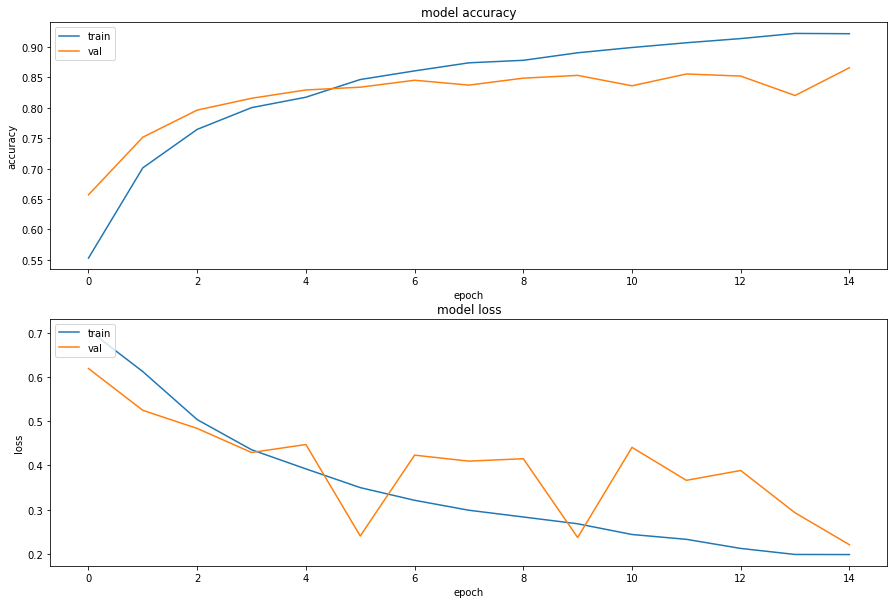

In [41]:
print(model_info.history.keys())  

plt.figure(1,figsize=(15,10))  

# summarize history for accuracy  

plt.subplot(211)  
plt.plot(model_info3.history['accuracy'])  
plt.plot(model_info3.history['val_accuracy'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  

# summarize history for loss  

plt.subplot(212)  
plt.plot(model_info3.history['loss'])  
plt.plot(model_info3.history['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'val'], loc='upper left')  
plt.show()  